------------
# Análisis Exploratorio
##### DefuncionesFetales

En este segundo Jupyter Notebook, se busca poder realizar el respoectivo análisis exploratorio para determinar la distribución de datos de Defunciones Fetales.

------------

##### Librerías
Como primer paso, se procederá a importar a todas las respectivas a utilizar.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from quickda.explore_data import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from copy import deepcopy

------------
##### Datos (Preview)
A continuación se importan los datos y se presenta cómo están almacenados los mismos. 

In [139]:
# Cargar el dataset
defunciones = pd.read_csv('./Dataset/Vitales/DefuncionesFetales.csv', low_memory=False)
defunciones.head()

,Área_Geográfica,Asistencia_Recibida,Año_Ocurrencia,Año_Registro,Causa_Defunción,Clase_Parto,Departamento_Ocurrencia,Departamento_Registro,Departamento_Residencia_Madre,Día_Ocurrencia,...,Semanas_Gestacion,Sexo,Sitio_Ocurrencia,Tipo_Atencion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos,Via_Parto,Nacionalidad_Madre,Grupo_Etnico_Madre
0,Ignorado,Empírica,9.0,9.0,P95X,Eutocio,Totonicapan,Totonicapan,Totonicapan,8.0,...,Ignorado,Hombre,Domicilio,Simple,Ignorado,2.0,1.0,NaN,Guatemalteca,No indigena
1,Ignorado,Médica,9.0,9.0,P240,Eutocio,Baja Verapaz,Baja Verapaz,Baja Verapaz,22.0,...,Ignorado,Hombre,Casa de salud,Simple,Ignorado,3.0,2.0,NaN,Guatemalteca,No indigena
2,Ignorado,Comadrona,9.0,9.0,P95X,Eutocio,Alta Verapaz,Alta Verapaz,Alta Verapaz,24.0,...,Ignorado,Hombre,Domicilio,Simple,Ignorado,3.0,2.0,NaN,Guatemalteca,No indigena
3,Ignorado,Comadrona,9.0,9.0,P964,Eutocio,Chimaltenango,Chimaltenango,Chimaltenango,29.0,...,Ignorado,Hombre,Domicilio,Simple,Ignorado,0.0,0.0,NaN,Guatemalteca,No indigena
4,Ignorado,Comadrona,9.0,9.0,P964,Eutocio,Totonicapan,Totonicapan,Totonicapan,7.0,...,Ignorado,Mujer,Domicilio,Simple,Ignorado,10.0,6.0,NaN,Guatemalteca,No indigena


En este caso, se cuenta con 22 variables. Asimismo, se tienen 39,298 datos disponibles de defunciones fetales del 2009 al 2021. 

Las variables utilizadas son las siguientes:

1. **Área Geográfica** -> Categórica (Urbano=1, Rural=2, Ignorado=99)

2. **Asistencia Recibida** -> Categórica (Médica=1, Paramédica=2, Comadrona=3, Empírica=4, Ninguna=5, Ignorado=99)
3. **Año Ocurrencia** -> Cuantitativa Discreta
4. **Año Registro** -> Cuantitativa Discreta
5. **Causa Defunción** -> Categórica (Código de CIE-10)
6. **Clase de Parto** -> Categórica (Eutocio=1, Distócico=2)
7. **Departamento Ocurrencia** -> Categórica 
8. **Departamento Registro**  -> Categórica
9. **Departamento Residencia Madre** -> Categórica
10. **Día Ocurrencia** -> Cuantitativa Discreta
11. **Edad Madre** -> Cuantitativa Discreta
12. **Estado Civil Madre** -> Categórica (Soltera=1, Casada=2, Unida=3, Ignorado=99)
13. **Escolaridad Madre** -> Categórica
14. **Mes Ocurrencia** -> Categórica
15. **Mes Registro** -> Categórica
16. **Municipio Ocurrencia** -> Categórica
17. **Municipio Registro** -> Categórica
18. **Municipio Residencia Madre** -> Categórica
19. **Ocupación Madre** -> Categórica
20. **Semanas Gestación** -> Cuantitativa Discreta
21. **Sexo** -> Categórica (Hombre=1, Mujer=2, Ignorado=99)
22. **Sitio Ocurrencia** -> Categórica (Hospital Publico=1, Hospital Privado=2, ...)
23. **Tipo Atencion (Tipo de Parto)** -> Categórica (Simple=1, Doble=2, Triple=3)
24. **Total Hijos Nacidos** -> Cuantitativa Discreta 
25. **Total Hijos Nacidos Muertos** -> Cuantitativa Discreta 
26. **Total Hijos_Vivos** -> Cuantitativa Discreta
27. **Via Parto** -> Categórica
28. **Nacionalidad Madre** -> Categórica
29. **Grupo Etnico Madre Madre** -> Categórica

------------
##### Datos Faltantes
En este caso, primero se analizó si hacían falta datos en el dataset. En este caso, habían varios datos faltantes.

Index(['Área_Geográfica', 'Año_Ocurrencia', 'Causa_Defunción',
       'Escolaridad_Madre', 'Ocupación_Madre', 'Total_Hijos_Nacidos',
       'Total_Hijos_Nacidos_Muertos', 'Total_Hijos_Vivos', 'Via_Parto'],
      dtype='object')

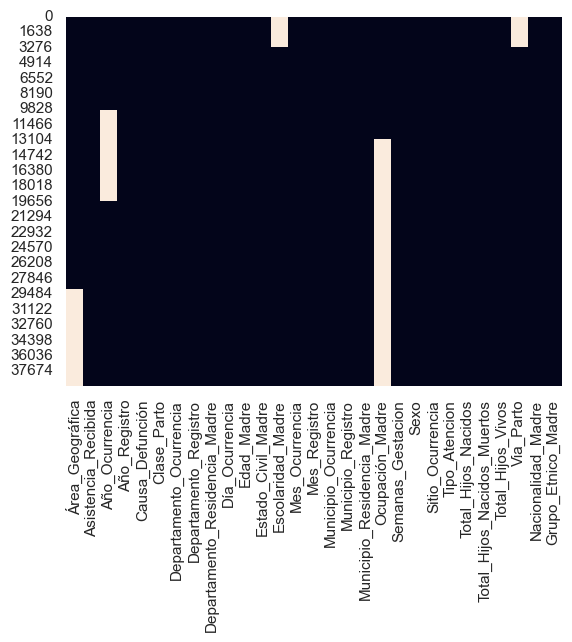

In [140]:
# Matriz de datos faltantes
sns.heatmap(defunciones.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
defunciones.columns[defunciones.isnull().any()]

In [148]:
# En el caso de datos faltantes de Area Geografica, se puede remplazar por el area geografica de filas con datos similares
defunciones['Área_Geográfica'].fillna(defunciones['Área_Geográfica'].mode()[0], inplace=True)

# En el caso de datos faltantes de año de ocurrencia, se puede copiar el año de registro
defunciones['Año_Ocurrencia'].fillna(defunciones['Año_Registro'], inplace=True)


# En el de columnas numericas con datos faltantes, se puede remplazar promedio de la columna
cuantitativas = ["Año_Ocurrencia", "Año_Registro", "Día_Ocurrencia", "Edad_Madre", "Total_Hijos_Nacidos", "Total_Hijos_Nacidos_Muertos", "Total_Hijos_Vivos", "Semanas_Gestacion"]
for col in cuantitativas:
    defunciones[col].replace("Ignorado", np.NAN, inplace=True)
    defunciones[col].replace("Ignorada", np.NAN, inplace=True)
    defunciones[col].replace(99, np.NAN, inplace=True)

for col in defunciones.columns.values:
    if col not in cuantitativas:
        defunciones[col].fillna("Ignorado", inplace=True)

# Hacer que las columnas numéricas sean numéricas
defunciones['Edad_Madre'] = pd.to_numeric(defunciones['Edad_Madre'], errors='coerce')
defunciones['Total_Hijos_Nacidos'] = pd.to_numeric(defunciones['Total_Hijos_Nacidos'], errors='coerce')
defunciones['Total_Hijos_Nacidos_Muertos'] = pd.to_numeric(defunciones['Total_Hijos_Nacidos_Muertos'], errors='coerce')
defunciones['Total_Hijos_Vivos'] = pd.to_numeric(defunciones['Total_Hijos_Vivos'], errors='coerce')

In [151]:
# Remplazar datos faltantes de columnas numericas con promedio de la columna
for col in cuantitativas:
    # Detectar cualquier dato que no sea un número, y remplazarlo por NaN
    defunciones[col] = pd.to_numeric(defunciones[col], errors='coerce')
    defunciones[col].fillna(defunciones[col].mean(), inplace=True)

defunciones.head()

,Área_Geográfica,Asistencia_Recibida,Año_Ocurrencia,Año_Registro,Causa_Defunción,Clase_Parto,Departamento_Ocurrencia,Departamento_Registro,Departamento_Residencia_Madre,Día_Ocurrencia,...,Semanas_Gestacion,Sexo,Sitio_Ocurrencia,Tipo_Atencion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos,Via_Parto,Nacionalidad_Madre,Grupo_Etnico_Madre
0,Ignorado,Empírica,9.0,9.0,P95X,Eutocio,Totonicapan,Totonicapan,Totonicapan,8.0,...,34.416349,Hombre,Domicilio,Simple,1.269311,2.0,1.0,Ignorado,Guatemalteca,No indigena
1,Ignorado,Médica,9.0,9.0,P240,Eutocio,Baja Verapaz,Baja Verapaz,Baja Verapaz,22.0,...,34.416349,Hombre,Casa de salud,Simple,1.269311,3.0,2.0,Ignorado,Guatemalteca,No indigena
2,Ignorado,Comadrona,9.0,9.0,P95X,Eutocio,Alta Verapaz,Alta Verapaz,Alta Verapaz,24.0,...,34.416349,Hombre,Domicilio,Simple,1.269311,3.0,2.0,Ignorado,Guatemalteca,No indigena
3,Ignorado,Comadrona,9.0,9.0,P964,Eutocio,Chimaltenango,Chimaltenango,Chimaltenango,29.0,...,34.416349,Hombre,Domicilio,Simple,1.269311,0.0,0.0,Ignorado,Guatemalteca,No indigena
4,Ignorado,Comadrona,9.0,9.0,P964,Eutocio,Totonicapan,Totonicapan,Totonicapan,7.0,...,34.416349,Mujer,Domicilio,Simple,1.269311,10.0,6.0,Ignorado,Guatemalteca,No indigena


Como se puede observar, en base al procedimiento anterior se pudo rellenar los datos faltantes.

Index([], dtype='object')

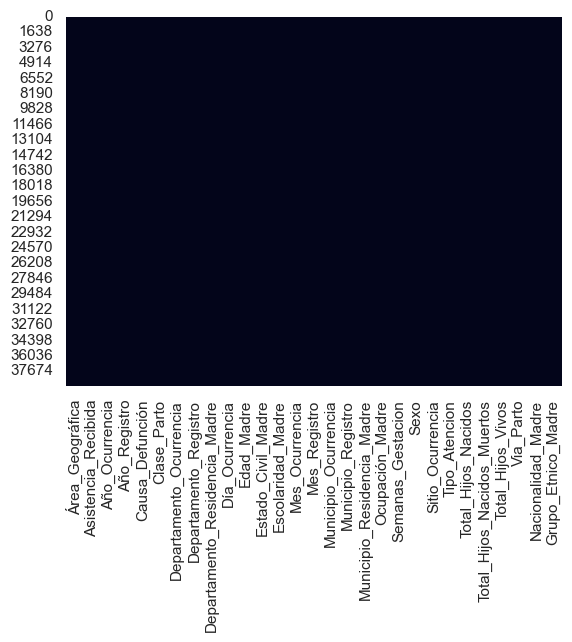

In [152]:
# Matriz de datos faltantes
sns.heatmap(defunciones.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
defunciones.columns[defunciones.isnull().any()]

------------
##### Limpieza Inicial de Datos
En este caso, se necesita que todas las columnas sigan el mismo patrón. Esto para asegurar la integridad de los datos y que estos sean utilizables a la hora de hacer la exploración inicial

In [174]:
# Revisar la columna de Año_Ocurrencia y Año_Registro. Verificar que sean 4 dígitos. Si no, agregar 20-- al inicio
# Hacer que los años sean ints
defunciones['Año_Ocurrencia'] = defunciones['Año_Ocurrencia'].astype(int)
defunciones['Año_Registro'] = defunciones['Año_Registro'].astype(int)

# Revisar que los años sean 4 dígitos
defunciones['Año_Ocurrencia'] = defunciones['Año_Ocurrencia'].apply(lambda x: 2000 + x if x <= 10 else x)
defunciones['Año_Registro'] = defunciones['Año_Registro'].apply(lambda x: 2000 + x if x <= 10 else x)

# ------------
# eliminar tilders y hacer que todo el texto sea en minusculas
categoricas = filter(lambda x: x not in cuantitativas, defunciones.columns.values)

for col in categoricas:
    defunciones[col] = defunciones[col].str.lower()
    defunciones[col] = defunciones[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    defunciones[col] = defunciones[col].str.replace(' ', '_')

# Clase parto combinar eutocico y eutocio, distocico y distocio
defunciones['Clase_Parto'] = defunciones['Clase_Parto'].replace('eutocio', 'eutocico')
defunciones['Clase_Parto'] = defunciones['Clase_Parto'].replace('distocio', 'distocico')

# Combinar basico y basica, ninguno y ninguna en Escolaridad_Madre
defunciones['Escolaridad_Madre'] = defunciones['Escolaridad_Madre'].replace('basico', 'basica')
defunciones['Escolaridad_Madre'] = defunciones['Escolaridad_Madre'].replace('ninguno', 'ninguna')

# combinar guatemala y guatemalteca en Nacionalidad_Madre
defunciones['Nacionalidad_Madre'] = defunciones['Nacionalidad_Madre'].replace('guatemala', 'guatemalteca')

# Estado civil combinar soltero y soltera, unida y unido, casado y casada
defunciones['Estado_Civil_Madre'] = defunciones['Estado_Civil_Madre'].replace('soltero', 'soltera')
defunciones['Estado_Civil_Madre'] = defunciones['Estado_Civil_Madre'].replace('unido', 'unida')
defunciones['Estado_Civil_Madre'] = defunciones['Estado_Civil_Madre'].replace('casado', 'casada')


------------
##### Exploración de Datos - Gráficos Exploratorios
Antes que nada, se quería determinar la distribución de los datos numéricos. 

Como se puede observar, el día de ocurrencia tiene sentido ya que es a la mitad del mes; esto puede demostrar una distribución normal en los daos.

Posteriormente, la edad mínima de la madre que perdió a su feto fue de 10 años. Esta probablemente era una niña victima de algún crimen sexual. Con relación a la edad máxima tenemos a 57 años; lo cual es entendible debido a las complicaciones que implica tener hijos a edades más avanzadas. 

In [154]:
# Use describe() method on selected rows only
defunciones.describe()

,Año_Ocurrencia,Año_Registro,Día_Ocurrencia,Edad_Madre,Semanas_Gestacion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos
count,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000,39298.000000
mean,2014.659728,2014.677185,15.651611,27.674640,34.416349,1.269311,4.035728,2.591752
std,3.656247,3.667674,8.767024,7.101628,5.409466,0.670889,1.759385,1.675662
min,2009.000000,2009.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,2011.000000,8.000000,22.000000,32.000000,1.000000,3.000000,1.000000
50%,2015.000000,2015.000000,16.000000,27.674640,35.000000,1.000000,4.035728,2.591752
75%,2018.000000,2018.000000,23.000000,33.000000,39.000000,1.269311,4.035728,2.591752
max,2021.000000,2022.000000,31.000000,57.000000,52.000000,30.000000,32.000000,16.000000


Como primer paso de los gráficos exploratorios, se ejcutó el comando de eda_num de QuickDa para poder obtener gráficas de diferentes columnas. Esto a través de obtener histogramas, así como diagramas de caja y bigotes. A continuación se presenta los resultados.

1. En este caso, la primera gráfica presenta un diagrama de caja y bigotes para determinar la distribución de la edad de las madres que tuvieron una defunción fetal. En este caso, la mayoría de datos se concentran entre 22 y 35 años de edad. Sin embargo, claramente se puede observar la presencia de puntos atípicos de mujeres con más de 50 años. Estos probablemente son datos atípicos ya que la cantidad de mujeres que se embarazan a esa edad es muy poca. 

2. En la segunda gráfica se presenta que la mayoría de personas tienen 1-3 hijos nacidos. Con el resto de valores siendo datos atípicos. Incluso habiendo un valor de 30 hijos nacidos. 

3. En el tercer diagrama de caja y bigotes se presenta la cantidad de hijos nacidos muertos. En este caso, la mayoría de personas que han tenido defunciones fetales han tenido otros 4 embarazos que han resultado de manera similar. En este caso se presentan datos atípicos, probablemente de mujeres que han sufrido de abortos espontáneos comunes así terminando en defunciones fetales. 

4. En el cuerto diagrama se presenta la cantidad de hijos vivos. En este caso se puede observar como, en promedio, la mayoría de personas tienen 1 a 2 hijos. Con la presencia de algunos puntos atípicos representativos de pocas mujeres que han tenido 5 o más hijos. 

5. Finalmente, se puede obsrvar a través del cuarto diagrama de caja y bigotes la distribución de años más frecuentes en las cuales ha habido más defunciones fetales. No se presentan puntos atípicos.

6. En el caso de las semanas de gestación del feto nacido, se puede observar que la mayoría están entre 30 y 40 semanas, lo cual es lo normal. Con la excepción de algunos fetos nacidos en las primeras 20 semanas, lo cual puede ser el resultado de abortos espontáneos. 

Posteriormente, también se graficó la misma información pero en histogramas. A través de esto se pudo observar nuevamente la distribución de los datos. 

1. En el caso de la distribución de las edades de la madre, se puede determinar la existencia de una distribución normal con sesgo positivo (sesgada a la derecha). Asimismo, se comprueba que la edad promedio de las madres es de 27-29 años de edad.

2. En la gráfica de total hijos nacidos, se puede observar una distribución no normal. Esto debido a que todos los datos se presentan en una única sección. Pareciera ser más una distribución logarítmica. 

3. Con relación al histograma de cantidad de hijos nacidos muertos, se puede determinar que la mayoría de madres han perdido 4 hijos. Asimismo, nuevemnte se podría decir que se tiene una distribución normal con sesgo positivo (sesgada a la derecha) leptocúrtica. 

4. En la gráfica de total hijos vivos, se presenta nuevaemente una distribución normal con sesgo positivo (sesgada a la derecha) leptocúrtica. Esto debido a la gran cantidad de datos presentados en el punto máximo de la campana, la cual se encuentra sesgada a la derecha de la distribución de los datos. 

5. Los años no presentan una distribución clara. Pareciera ser una distribución uniforme, pero algunos años presentan varias defunciones fetales adicionales que el resto. 

6. En la gráfica de las semanas de gestación, se presenta nuevaemente una distribución normal con sesgo negativo (sesgada a la izquierda). Esto debido a que la mayoría de fetos nacidos muertos normalmente habían pasado más de 30 semanas en gestación.

Outlier Analysis - Boxplot


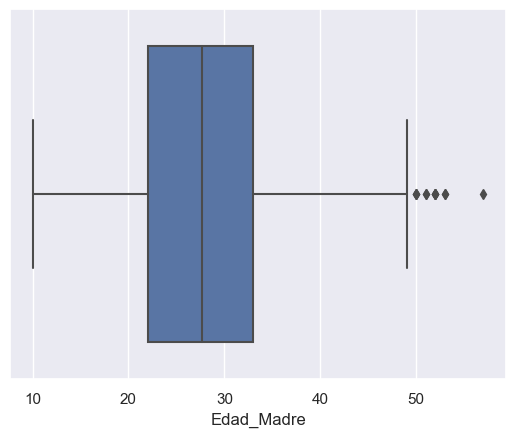

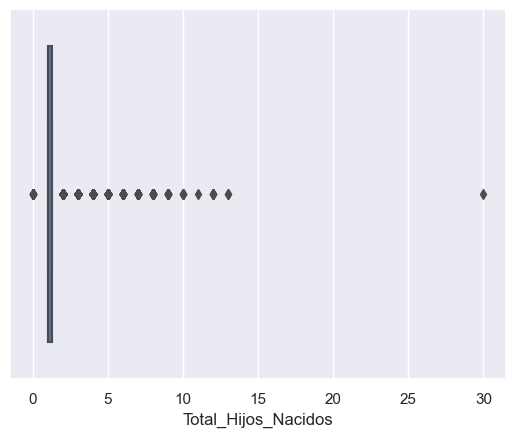

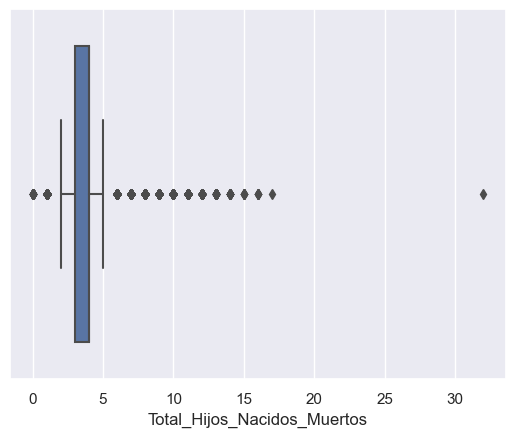

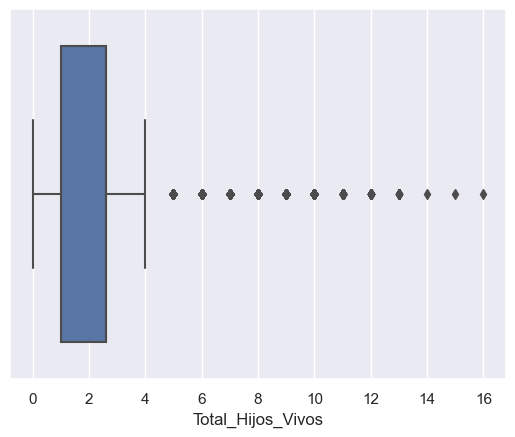

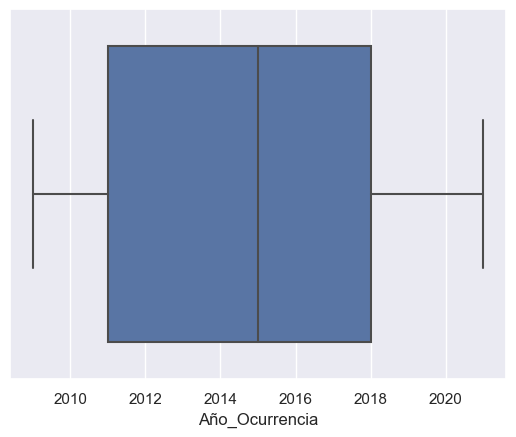

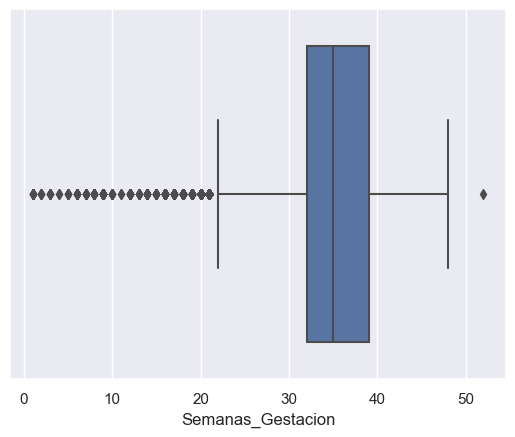

Distribution Analysis - Histogram


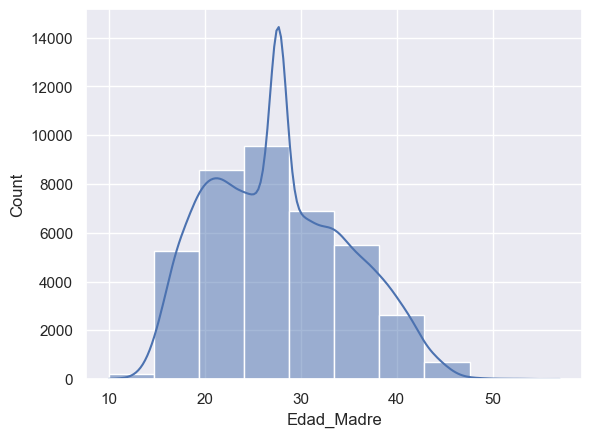

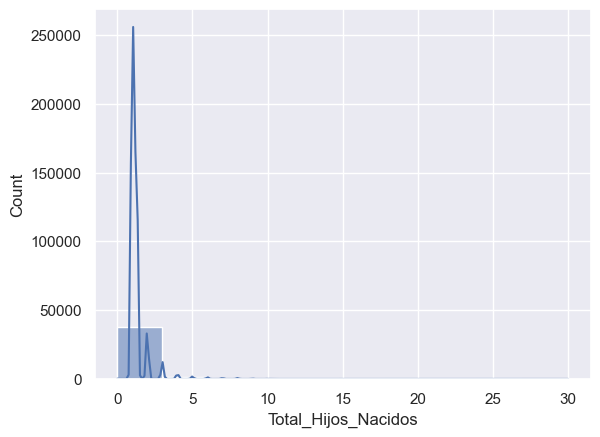

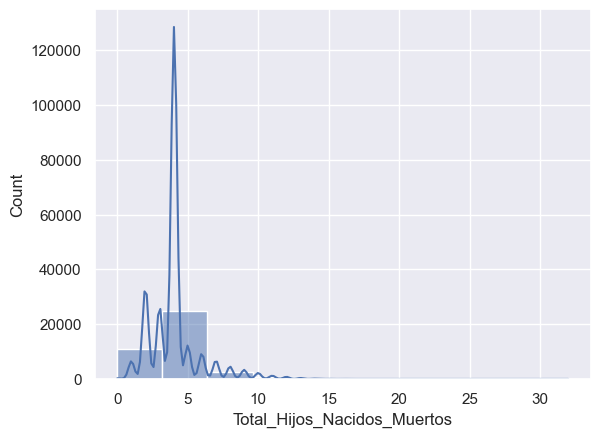

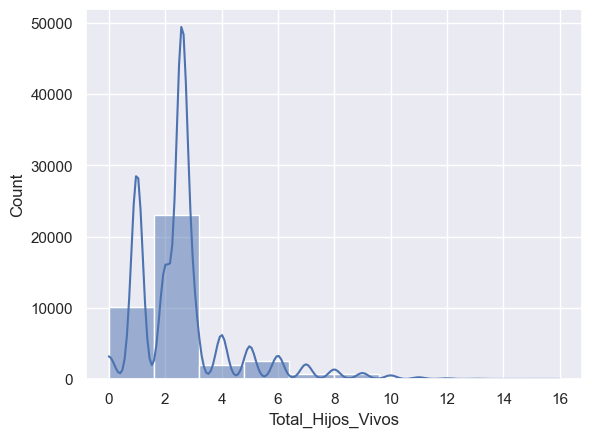

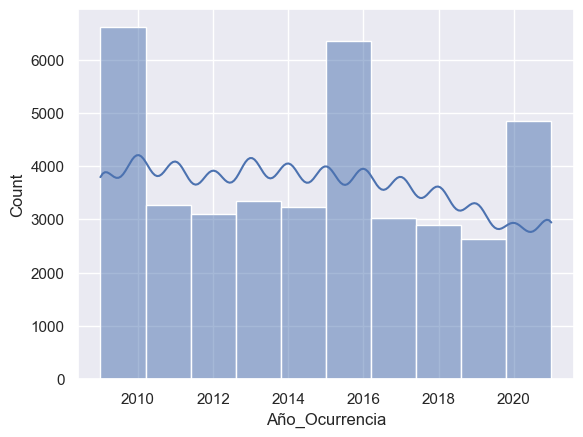

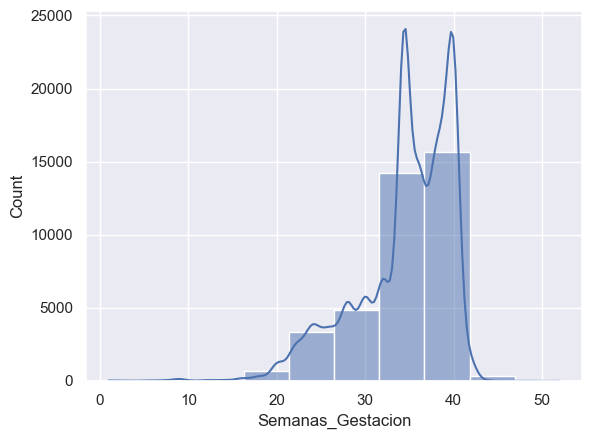

In [155]:

defunciones_copy = deepcopy(defunciones)

columns = ['Edad_Madre', 'Total_Hijos_Nacidos', 'Total_Hijos_Nacidos_Muertos', 'Total_Hijos_Vivos', 'Año_Ocurrencia', 'Semanas_Gestacion']
dataTemp = defunciones_copy[columns]

eda_num(dataTemp)

Posteriormente, se prosiguió con el análisis de las variables categóricas más significativas. En este caso, se analizó área geográfica, asistencia recibida, causa de defunción, clase de parto, departamento ocurrencia, estado civil de la madre, grupo étnico de la madre, ocupación de la madre, sexo del feto, sitio de ocurrencia, tipo de atención, escolaridad de la madre, via parto, nacionalidad de la madre. A continuación se presenta un análisis delos respectivos resultados.

1. A través de la primera tabla de frecuencia, se pudo determinar que la mayoría de defunciones fetales ocurren en el ambiente urbano. Con aproximadamente 78% de estos sucesos sucediento en dicha área.  Cabe destacar que en áreas rurales puede que sea aún más común, pero no siempre han dónde las mujeres puedan reportar lo sucedido (si es que lo desean hacer). Asimismo, varias personas no acuden a centros médicos, por lo cual no siempre se lleva un registro. 

In [157]:
col = "Área_Geográfica"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Área_Geográfica 	Frecuencia 
****************************
urbano      30887
rural        5358
ignorado     3053
Name: Área_Geográfica, dtype: int64


2. A través de esto, se pudo determinar que la mayoría de mujeres que dan a luz a un feto muerto son asistidas por personal médico. Sin embargo, hay una gran cantidad de personas que no reciben algún tipo de atención; ya sea porque fue un aborto espontáneo y no tuvieron ayuda de algún profesional... o porque tal vez era alguien que simplemente no tenía acceso a la respectiva asistencia necesitada. 

In [158]:
col = "Asistencia_Recibida"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Asistencia_Recibida 	Frecuencia 
****************************
medica        27046
comadrona      6183
ninguna        3373
ignorada       2167
paramedica      270
empirica        259
Name: Asistencia_Recibida, dtype: int64


3. En el caso de las causas de defunciones, se puede observar que la mayoría son (P95) Muerte fetal de causa no especificada. Mientras que en el segundo lugar se encuentran las que son de tipo (P20.9) Hipoxia intrauterina, no especificada. 

> Cabe destacar que se puede observar que hay algunas causas indicadas en el formato CIE-10 y otras están con el nombre en sí. Esto hay que modificarlo y hacer un encoding unificado.

In [159]:
col = "Causa_Defunción"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Causa_Defunción 	Frecuencia 
****************************
p95x                                                                                 14708
p209                                                                                 10709
muerte_fetal_de_causa_no_especificada                                                 2873
hipoxia_intrauterina,_no_especificada                                                 1981
q899                                                                                   608
                                                                                     ...  
hipoxia_intrauterina_notada_por_primera_vez_antes_del_inicio_del_trabajo_de_parto        1
encefalocele,_no_especificado                                                            1
q930                                                                                     1
otras_malformaciones_congenitas_de_la_pared_abdominal                                    1
p

4. En el caso de los partos, se puede determinar que la mayoría de defunciones fetales ocurren en partos eutocicos; es decir parte que no tienen complicaciones durante ningun periodo y que son partos por vía vaginal sin ninguna intervensión médica. Esto es interesante, ya que casi 28,000 fetos nacieron muertos a pesar de no presentar complciaciones anteriores. Sin embargo, únicamente 8,000 de los partos que presentaron defunciones fetales eran distocicos; es decir que sí tuvo que haber intervensión médica. 

In [160]:
col = "Clase_Parto"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Clase_Parto 	Frecuencia 
****************************
eutocico     28637
distocico     8495
ignorado      2166
Name: Clase_Parto, dtype: int64


5. En este caso, se presenta la ocurrencia de defunciones fetales por departamento. Guatemala, siendo el departamento con mayor población, lógicamente se posiciona en primer lugar. 

In [161]:
col = "Departamento_Ocurrencia"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Departamento_Ocurrencia 	Frecuencia 
****************************
guatemala         9691
alta_verapaz      5508
quiche            2912
quetzaltenango    2857
chimaltenango     2191
solola            2171
totonicapan       1997
huehuetenango     1680
escuintla         1668
san_marcos        1433
suchitepequez     1155
sacatepequez      1036
baja_verapaz       975
peten              779
retalhuleu         588
santa_rosa         526
jalapa             503
jutiapa            491
izabal             447
el_progreso        284
chiquimula         265
zacapa             141
Name: Departamento_Ocurrencia, dtype: int64


6. A continuación se presenta que la mayoría de mujeres que experimentaron defunción fetal fueron mujeres solteras. Sin embargo, las mujeres casadas presentan una cantidad similar, aunque menor.

In [162]:
col = "Estado_Civil_Madre"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Estado_Civil_Madre 	Frecuencia 
****************************
soltera     20201
casada      15996
ignorado     2982
unida         119
Name: Estado_Civil_Madre, dtype: int64


7. Con relación a las mujeres que más frecuentemente experimentaron defunción fetal, las mujeres maya son las que normalmente presentan mayor probabilidad de experimentar esta situación. Con las mujeres Garifuna y Xinca siendo las personas que menor probabilidad tienen. 

In [163]:
col = "Grupo_Etnico_Madre"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Grupo_Etnico_Madre 	Frecuencia 
****************************
maya                13459
mestizo_/_ladino     9523
ignorado             7557
indigena             4639
no_indigena          3678
otro                  405
garifuna               22
xinka                  15
Name: Grupo_Etnico_Madre, dtype: int64


8. En el caso de las ocupaciones más comunes entre mujeres que han pasado por una defunción fetal, la mayoría de mujeres prefirieron no indicar su oficio. Sin embargo, varias mujeres indicaron que se dedicaban a oficios domesticos (remunerados y no remunerados), mientras que el tercer lugar indicó que eran estudiantes.

In [164]:
col = "Ocupación_Madre"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Ocupación_Madre 	Frecuencia 
****************************
ignorado                             29152
oficios_domesticos_no_remunerados     5694
oficios_domesticos_no_remunerado      2413
estudiante                            1081
maestros_de_ensenanza_primaria         217
                                     ...  
5131.0                                   1
guias_de_turismo                         1
camareros_de_mesas                       1
4419.0                                   1
9313.0                                   1
Name: Ocupación_Madre, Length: 103, dtype: int64


9. Con relación al sexo de los fetos nacidos muertos, se puede observar un nivel similar entre hombres y mujeres. 

In [165]:
col = "Sexo"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Sexo 	Frecuencia 
****************************
hombre      20690
mujer       18427
ignorado      181
Name: Sexo, dtype: int64


10. A través de la siguiente tabla de frecuencia se pudo determinar los lugares más comúnes donde mujeres dieron a luz su feto. En este caso, aproximadamente 20,000 personas asistieron a un centro hospitalario público. Por otro lado, casi 9,000 estuvieron en su hogar; posiblemente si hubieran tenido acceso a un centro hospitalario hubiera habido un resultado diferente.

In [166]:
col = "Sitio_Ocurrencia"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Sitio_Ocurrencia 	Frecuencia 
****************************
hospital_publico    19910
domicilio            8548
ignorado             5211
hospital_privado     2141
seguro_social        1711
centro_de_salud      1006
hospital              600
otro                   62
via_publica            54
casa_de_salud          37
lugar_de_trabajo       18
Name: Sitio_Ocurrencia, dtype: int64


11. En este caso, la mayoría de personas tuvieron un único feto nacido. Sin embargo, hubo casos donde era un parto de 2 o 3 fetos. 

In [167]:
col = "Tipo_Atencion"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Tipo_Atencion 	Frecuencia 
****************************
simple      35901
ignorado     2166
doble        1203
triple         28
Name: Tipo_Atencion, dtype: int64


12. En la mayoría de caso, el parto vaginal fue el que presentó la mayor probabilidad de resultar en defunciones fetales. Esto posiblemente a que la falta de intervención quirurjica resultó en la muerte del feto.

In [169]:
col = "Via_Parto"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Via_Parto 	Frecuencia 
****************************
vaginal     27801
cesarea      8264
ignorado     3233
Name: Via_Parto, dtype: int64


13. La mayoría de madres que reportaron defunciones fetales indicaron que no tenían ninguna escolaridad. o que simplemente tenían educacion primaria. Por tal razón, se podría inferir que la falta de educación ocasionó que las madres no cuidaran su embarazo de la forma que debían. Como resultado, este mismo resultó en una defunción fetal. 

In [173]:
col = "Escolaridad_Madre"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())


****************************
 Escolaridad_Madre 	Frecuencia 
****************************
ninguna          12544
primaria         11794
ignorado          6464
diversificado     4336
basica            3633
universitario      524
postgrado            3
Name: Escolaridad_Madre, dtype: int64


14. Finalmente, la mayoría de datos registrados indican que las madres eran de guatemala. Esto teniendo lógica debido a que las estadísticas son del mismo país. 

In [175]:
col = "Nacionalidad_Madre"
print("\n****************************\n",col,"\tFrecuencia","\n****************************")
print(defunciones[col].value_counts())




****************************
 Nacionalidad_Madre 	Frecuencia 
****************************
guatemalteca                 36058
ignorado                      2986
el_salvador                     81
mexico                          53
honduras                        47
nicaragua                       35
estados_unidos_de_america       14
extranjera                       4
costa_rica                       4
colombia                         4
belice                           2
espana                           2
jordania                         1
guyana                           1
argentina                        1
china                            1
israel                           1
brasil                           1
australia                        1
japon                            1
Name: Nacionalidad_Madre, dtype: int64


------------
##### Limpieza Datos: Encoding, Scaling

In [ ]:
# convertir Área Geográfica -> (Urbano=1, Rural=2, Ignorado=99)
defunciones['Área_Geográfica'] = defunciones['Área_Geográfica'].map({'Urbano': 1, 'Rural': 2, 'Ignorado': 99})

# convertir Sexo -> (Masculino=1, Femenino=2, Ignorado=99)

------------
##### Correlación

En base al procedimiento anterior, se prosiguió a determinar la correlación entre las distintas variables. 

En este caso, se determinó que algunas variables con mayor importancia son:
1. Área_Geográfica
2. Asistencia_Recibida
3. Causa_Defunción
4. Clase_Parto
5. Departamento_Ocurrencia
6. Edad_Madre
7. Escolaridad_Madre
8. Municipio_Ocurrencia
9. Ocupación_Madre
10. Semanas_Gestacion
11. Sitio_Ocurrencia
12. Via_Parto
13. Grupo_Etnico_Madre

In [ ]:
# separar las variables más importantes
vars = defunciones[['Área_Geográfica', 'Asistencia_Recibida', 'Causa_Defunción', 'Clase_Parto', 'Departamento_Ocurrencia', 'Edad_Madre', 'Escolaridad_Madre', 'Municipio_Ocurrencia', 'Ocupación_Madre', 'Semanas_Gestacion', 'Sitio_Ocurrencia', 'Via_Parto', 'Grupo_Etnico_Madre']]

# matriz de correlación variables numericas y categoricas
sns.heatmap(vars.corr(), annot=True)
plt.show()